# **Objective** 

The main objective of this code is to produce the causal graph from the input text statments by [INDRA](http://www.indra.bio/) framework 

the code use python 3.5+

**INDRA knowledge input APIs / processors**

*   Natural language processing systems (molecular biology / general)

*  Databases of molecular interactions

**INDRA output assemblers**

*   Rule-based dynamical models

*   Causal network models
*   Graphic formats for visualization
*   English language

Natural language modeling, rapid prototyping Cover by EMBO Press (Artistic rendition by Uta Mackensen), see http://msb.embopress.org/content/13/11/954




#**Required Configuration**


##**API Required Instalation**

These API are required to achive the main objective but are not built in by default in python  

In [1]:
!pip install pydot pydot-ng

In [2]:
#https://stackoverflow.com/questions/15661384/python-does-not-see-pygraphviz
!sudo apt-get install -y graphviz libgraphviz-dev pkg-config python-pip
!sudo pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
The following additional packages will be installed:
  libgvc6-plugins-gtk libpython-all-dev libxdot4 python-all python-all-dev
  python-asn1crypto python-cffi-backend python-crypto python-cryptography
  python-dbus python-enum34 python-gi python-idna python-ipaddress
  python-keyring python-keyrings.alt python-pip-whl python-pkg-resources
  python-secretstorage python-setuptools python-six python-wheel python-xdg
Suggested packages:
  python-crypto-doc python-cryptography-doc python-cryptography-vectors
  python-dbus-dbg python-dbus-doc python-enum34-doc python-gi-cairo
  gnome-keyring libkf5wallet-bin gir1.2-gnomekeyring-1.0 python-fs
  python-gdata python-keyczar python-secretstorage-doc python-setuptools-doc
The following NEW packages will be installed:
  libgraphviz-dev libgvc6

In [58]:
!pip install indra[all]

     |████████████████████████████████| 133kB 6.1MB/s 
     |████████████████████████████████| 245kB 12.2MB/s 
     |████████████████████████████████| 276kB 13.8MB/s 
     |████████████████████████████████| 2.6MB 14.3MB/s 
     |████████████████████████████████| 35.3MB 92kB/s 
     |████████████████████████████████| 4.2MB 40.8MB/s 
     |████████████████████████████████| 460kB 37.3MB/s 
     |████████████████████████████████| 174kB 41.3MB/s 
  Created wheel for adeft: filename=adeft-0.6.0-cp36-cp36m-linux_x86_64.whl size=381944 sha256=26c9c00e517dceea5d685641c65ea8bfad21b19928de33fbf5c7867ad920fb0d
  Stored in directory: /root/.cache/pip/wheels/e1/0a/65/265bee5667d66c3c9989e4564e0e02075b6baea27324a9f9ff
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=38a7871d8d11a9ac4d7f6772cd0fb278b41088ec6021f570666376fad087d72d
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for

In [4]:
!pip install pybel

     |████████████████████████████████| 348kB 6.2MB/s 


##**API Required Importing**

In [5]:
from pygraphviz import *
import os
%pylab inline
import json
from indra.sources import trips # to read  simple statment/s
from indra.statements import draw_stmt_graph, stmts_to_json
from indra.sources import trips
from indra.assemblers.pybel import PybelAssembler
from indra.assemblers.pysb.assembler import PysbAssembler
from pybel.canonicalize import edge_to_bel


Populating the interactive namespace from numpy and matplotlib


INFO: [2020-05-08 23:10:51] protmapper.resources - Could not access 'hgnc' resource file, will download.
INFO: [2020-05-08 23:10:51] protmapper.resources - Downloading 'hgnc' resource file into /root/.protmapper/0.0.16/hgnc_entries.tsv from cache.
INFO: [2020-05-08 23:10:53] pybel.config - no configuration found, using default sqlite connection sqlite:////root/.pybel/pybel_0.14.0_cache.db
INFO: [2020-05-08 23:10:57] indra.preassembler.grounding_mapper.adeft - Adeft will not be available for grounding disambiguation.


#**Demo**


In this example INDRA assembles a PySB model from the natural language description of a mechanism via the TRIPS parser web service.

###**General Function**

In [0]:
def  tp_trips(input_text):
    tp=trips.process_text(input_text)
    for st in tp.statements:
        print('%s with evidence "%s"' % (st, st.evidence[0].text))
    return tp

In [0]:
def mechanistic_model(tp,policies='two_step'):
    ## Collect extracted mechanisms in PysbAssembler
    pa = PysbAssembler()
    pa.add_statements(tp.statements)
    ## Assemble the model
    pa.make_model(policies=policies)
    return pa

In [0]:
def model_featurs(pa):
    for monomer in pa.model.monomers:
        print(monomer)
    print("-"*50)
    for rule in pa.model.rules:
        print(rule)
    print("-"*50)
    for parameter in pa.model.parameters:
        print(parameter)
    print("-"*50)
    for annotation in pa.model.annotations:
        print(annotation)
    print("-"*50)
    for c in pa.model.initial_conditions:
        print(c)
    print("-"*50)

In [0]:
def drow_graph(tp):
    pylab.rcParams['figure.figsize'] = (12, 18)
    tp_graph=tp.statements[1:]
    #print(tp_graph,"\n")
    #print(type(tp_graph))
    for t in tp_graph:
        print(t,"\n")
        l=[]
        l.append(t)
        if len(l)!=0:
        
            draw_stmt_graph(l)#:])
        else:
            print("No Graph, Empty list")


##**Simple Statement**

In [6]:
input_text ='MAP2K1 phosphorylates MAPK1 and DUSP6 dephosphorylates MAPK1.'

tp = trips.process_text(input_text)


INFO: [2020-05-08 14:49:49] protmapper.resources - Could not access 'up' resource file, will download.
INFO: [2020-05-08 14:49:49] protmapper.resources - Downloading 'up' resource file into /root/.protmapper/0.0.16/uniprot_entries.tsv from cache.
INFO: [2020-05-08 14:49:55] protmapper.resources - Could not access 'up_sars_cov2' resource file, will download.
INFO: [2020-05-08 14:49:55] protmapper.resources - Downloading 'up_sars_cov2' resource file into /root/.protmapper/0.0.16/uniprot_sars_cov2_entries.tsv from cache.
INFO: [2020-05-08 14:50:03] protmapper.resources - Could not access 'upsec' resource file, will download.
INFO: [2020-05-08 14:50:03] protmapper.resources - Downloading 'upsec' resource file into /root/.protmapper/0.0.16/uniprot_sec_ac.txt from cache.


In [7]:
for st in tp.statements:
   ...:     print('%s with evidence "%s"' % (st, st.evidence[0].text))

Phosphorylation(MAP2K1(), MAPK1()) with evidence "MAP2K1 phosphorylates MAPK1 and DUSP6 dephosphorylates MAPK1."
Dephosphorylation(DUSP6(), MAPK1()) with evidence "MAP2K1 phosphorylates MAPK1 and DUSP6 dephosphorylates MAPK1."


###**Build a rule-based mechanistic model of this knowledge**

In [19]:
## Collect extracted mechanisms in PysbAssembler
pa = PysbAssembler()
pa.add_statements(tp.statements)
## Assemble the model
pa.make_model(policies='two_step')

INFO: [2020-05-08 23:34:34] indra.assemblers.pysb.assembler - Using two_step assembly policy.


<Model 'indra_model' (monomers: 4, rules: 10, parameters: 14, expressions: 0, compartments: 0) at 0x7fe87e2f5e80>

In [9]:

for monomer in pa.model.monomers:
    print(monomer)

Monomer('MAP2K1', ['mapk'])
Monomer('MAPK1', ['phospho', 'map2k', 'dusp'], {'phospho': ['u', 'p']})
Monomer('DUSP6', ['mapk'])


In [10]:
for rule in pa.model.rules:
    print(rule)

Rule('MAP2K1_phosphorylation_bind_MAPK1_phospho', MAP2K1(mapk=None) + MAPK1(phospho='u', map2k=None) >> MAP2K1(mapk=1) % MAPK1(phospho='u', map2k=1), kf_mm_bind_1)
Rule('MAP2K1_phosphorylation_MAPK1_phospho', MAP2K1(mapk=1) % MAPK1(phospho='u', map2k=1) >> MAP2K1(mapk=None) + MAPK1(phospho='p', map2k=None), kc_mm_phosphorylation_1)
Rule('MAP2K1_dissoc_MAPK1', MAP2K1(mapk=1) % MAPK1(map2k=1) >> MAP2K1(mapk=None) + MAPK1(map2k=None), kr_mm_bind_1)
Rule('DUSP6_dephosphorylation_bind_MAPK1_phospho', DUSP6(mapk=None) + MAPK1(phospho='p', dusp=None) >> DUSP6(mapk=1) % MAPK1(phospho='p', dusp=1), kf_dm_bind_1)
Rule('DUSP6_dephosphorylation_MAPK1_phospho', DUSP6(mapk=1) % MAPK1(phospho='p', dusp=1) >> DUSP6(mapk=None) + MAPK1(phospho='u', dusp=None), kc_dm_phosphorylation_1)
Rule('DUSP6_dissoc_MAPK1', DUSP6(mapk=1) % MAPK1(dusp=1) >> DUSP6(mapk=None) + MAPK1(dusp=None), kr_dm_bind_1)


In [11]:
for parameter in pa.model.parameters:
    print(parameter)

Parameter('kf_mm_bind_1', 1e-06)
Parameter('kr_mm_bind_1', 0.1)
Parameter('kc_mm_phosphorylation_1', 100.0)
Parameter('kf_dm_bind_1', 1e-06)
Parameter('kr_dm_bind_1', 0.1)
Parameter('kc_dm_phosphorylation_1', 100.0)
Parameter('MAP2K1_0', 10000.0)
Parameter('MAPK1_0', 10000.0)
Parameter('DUSP6_0', 10000.0)


In [12]:
for annotation in pa.model.annotations:
    print(annotation)

Annotation(MAP2K1, 'https://identifiers.org/hgnc/HGNC:6840', 'is')
Annotation(MAP2K1, 'https://identifiers.org/uniprot/Q02750', 'is')
Annotation(MAP2K1, 'https://identifiers.org/ncit/C17808', 'is')
Annotation(MAPK1, 'https://identifiers.org/hgnc/HGNC:6871', 'is')
Annotation(MAPK1, 'https://identifiers.org/uniprot/P28482', 'is')
Annotation(MAPK1, 'https://identifiers.org/ncit/C17589', 'is')
Annotation(DUSP6, 'https://identifiers.org/hgnc/HGNC:3072', 'is')
Annotation(DUSP6, 'https://identifiers.org/uniprot/Q16828', 'is')
Annotation(DUSP6, 'https://identifiers.org/ncit/C106024', 'is')
Annotation(MAP2K1_phosphorylation_bind_MAPK1_phospho, '4f1e1708-4dbf-4745-aaf1-b516e64ec4e7', 'from_indra_statement')
Annotation(MAP2K1_phosphorylation_MAPK1_phospho, 'MAP2K1', 'rule_has_subject')
Annotation(MAP2K1_phosphorylation_MAPK1_phospho, 'MAPK1', 'rule_has_object')
Annotation(MAP2K1_phosphorylation_MAPK1_phospho, '4f1e1708-4dbf-4745-aaf1-b516e64ec4e7', 'from_indra_statement')
Annotation(MAP2K1_dissoc

In [0]:
trips_assembly = PybelAssembler(tp.statements, name='TRIPS Test', version='0.0.1')

In [0]:
for u, v, k, d in trips_assembly.model.edges():
    print(edge_to_bel(trips_assembly.model, u, v, d))



###**Drawing Statement as graphs**

Next, we can use the draw_stmt_graph function to display the Statements produced by reading and INDRA input processing as a graph. The root of each tree is the type of the Statement, in this case Autophosphorylation. The arguments of the Statement branch off from the root. In this case the enzyme argument of Autophosphorylation is an Agent with name ATM. Its database references can be inspected under the db_refs property.
https://github.com/sorgerlab/indra_apps/blob/master/indra_statements_demo.ipynb

[Dephosphorylation(DUSP6(), MAPK1())]


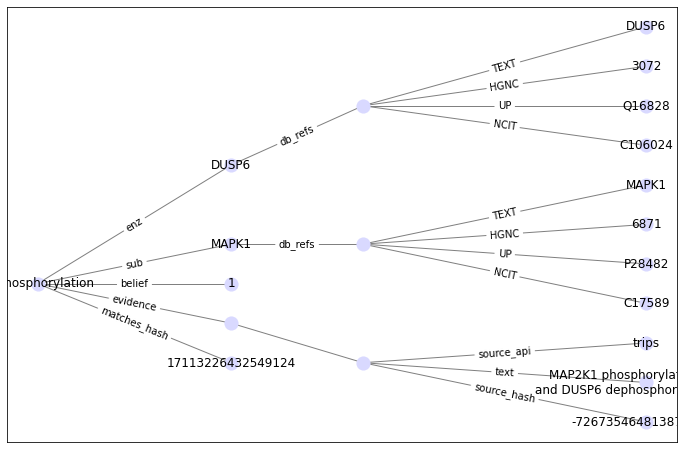

In [15]:

pylab.rcParams['figure.figsize'] = (12, 8)
tp_graph=tp.statements[1:]
print(tp_graph)
if len(tp_graph)!=0:
    
    draw_stmt_graph(tp.statements[1:])
else:
    print("No Graph, Empty list")




##**Pragraph**
https://github.com/sorgerlab/indra_apps/blob/master/tutorial/Tutorial.ipynb





In [0]:
txt = """
EPO activates JAK1, and active JAK1 phosphorylates STAT3. 
Phosphorylated STAT3 translocates to the nucleus. 
STAT3 in the nucleus is active. Active STAT3 transcribes JAK1.
PTP1B dephosphorylates STAT3. 
Unphosphorylated STAT3 translocates from the nucleus to the cytoplasm.
"""

In [7]:
tp = trips.process_text(txt, save_xml_name='model_reading.xml')

INFO: [2020-05-08 23:11:13] protmapper.resources - Could not access 'up' resource file, will download.
INFO: [2020-05-08 23:11:13] protmapper.resources - Downloading 'up' resource file into /root/.protmapper/0.0.16/uniprot_entries.tsv from cache.
INFO: [2020-05-08 23:11:18] protmapper.resources - Could not access 'up_sars_cov2' resource file, will download.
INFO: [2020-05-08 23:11:18] protmapper.resources - Downloading 'up_sars_cov2' resource file into /root/.protmapper/0.0.16/uniprot_sars_cov2_entries.tsv from cache.
INFO: [2020-05-08 23:11:28] protmapper.resources - Could not access 'upsec' resource file, will download.
INFO: [2020-05-08 23:11:28] protmapper.resources - Downloading 'upsec' resource file into /root/.protmapper/0.0.16/uniprot_sec_ac.txt from cache.


Inspect the INDRA Statements that were extracted

In [8]:
tp.statements

[Phosphorylation(JAK1(activity), STAT3()),
 Dephosphorylation(PTPN1(), STAT3()),
 ActiveForm(STAT3(location: nucleus), activity, True),
 Activation(EPO(), JAK1()),
 Translocation(STAT3(mods: (phosphorylation)), None, nucleus),
 Translocation(STAT3(mods: (phosphorylation, False)), nucleus, cytoplasm),
 IncreaseAmount(STAT3(activity), JAK1())]

###**Build a rule-based mechanistic model of this knowledge**

In [20]:
pa = PysbAssembler()
pa.add_statements(tp.statements)
model = pa.make_model(policies='one_step')
pa.set_context('BT20_BREAST')

INFO: [2020-05-08 23:35:46] indra.assemblers.pysb.assembler - Using one_step assembly policy.
INFO: [2020-05-08 23:35:46] indra.assemblers.pysb.assembler - Monomers set to given context
INFO: [2020-05-08 23:35:46] indra.assemblers.pysb.assembler - -----------------------------
INFO: [2020-05-08 23:35:46] indra.assemblers.pysb.assembler - JAK1
INFO: [2020-05-08 23:35:46] indra.assemblers.pysb.assembler - STAT3
INFO: [2020-05-08 23:35:46] indra.assemblers.pysb.assembler - PTPN1
INFO: [2020-05-08 23:35:46] indra.assemblers.pysb.assembler - EPO



###**Interactively look at the components of the model¶**

In [22]:

for monomer in pa.model.monomers:
    print(monomer)

Monomer('JAK1', ['activity'], {'activity': ['inactive', 'active']})
Monomer('STAT3', ['phospho', 'loc'], {'phospho': ['u', 'p'], 'loc': ['nucleus', 'cytoplasm']})
Monomer('PTPN1')
Monomer('EPO')


In [23]:

for rule in pa.model.rules:
    print(rule)

Rule('JAK1_act_phosphorylation_STAT3_phospho', JAK1(activity='active') + STAT3(phospho='u') >> JAK1(activity='active') + STAT3(phospho='p'), kf_js_phosphorylation_1)
Rule('PTPN1_dephosphorylation_STAT3_phospho', PTPN1() + STAT3(phospho='p') >> PTPN1() + STAT3(phospho='u'), kf_ps_phosphorylation_1)
Rule('EPO_activates_JAK1_activity', EPO() + JAK1(activity='inactive') >> EPO() + JAK1(activity='active'), kf_ej_act_1)
Rule('STAT3_phospho_translocates_cytoplasm_to_nucleus', STAT3(phospho=('p', WILD), loc='cytoplasm') >> STAT3(phospho=('p', WILD), loc='nucleus'), kf_stat3_cytoplasm_nucleus_1)
Rule('STAT3_phospho_translocates_nucleus_to_cytoplasm', STAT3(phospho=('u', WILD), loc='nucleus') >> STAT3(phospho=('u', WILD), loc='cytoplasm'), kf_stat3_nucleus_cytoplasm_1)
Rule('STAT3_nucleus_produces_JAK1', STAT3(loc='nucleus') + None >> STAT3(loc='nucleus') + JAK1(activity='inactive'), kf_sj_synth_1)


**Drawing Statement as graphs**

Dephosphorylation(PTPN1(), STAT3()) 



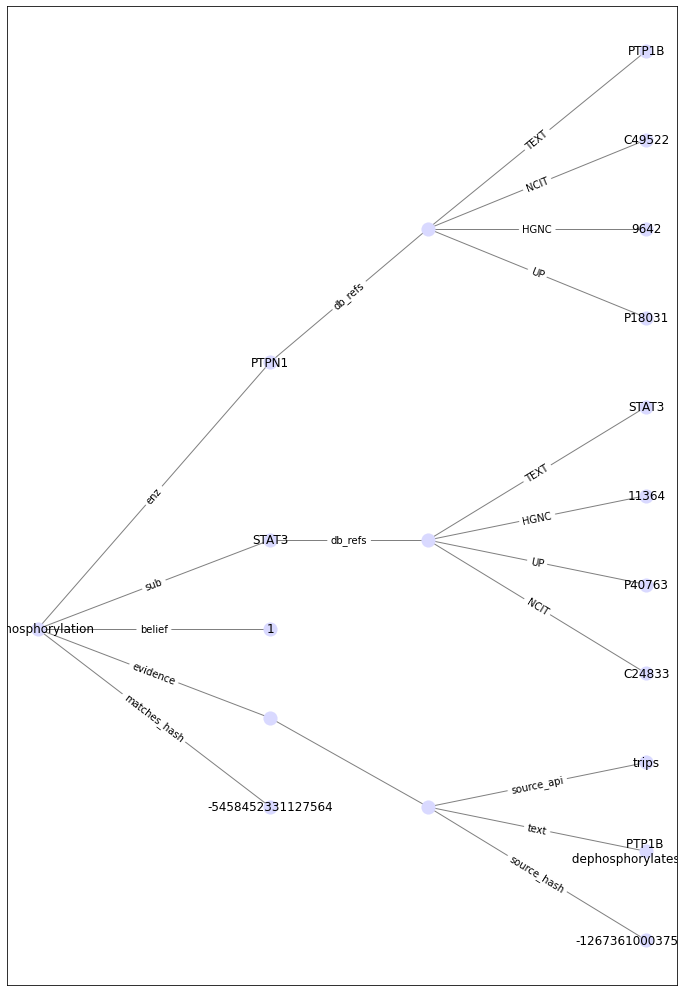

ActiveForm(STAT3(location: nucleus), activity, True) 



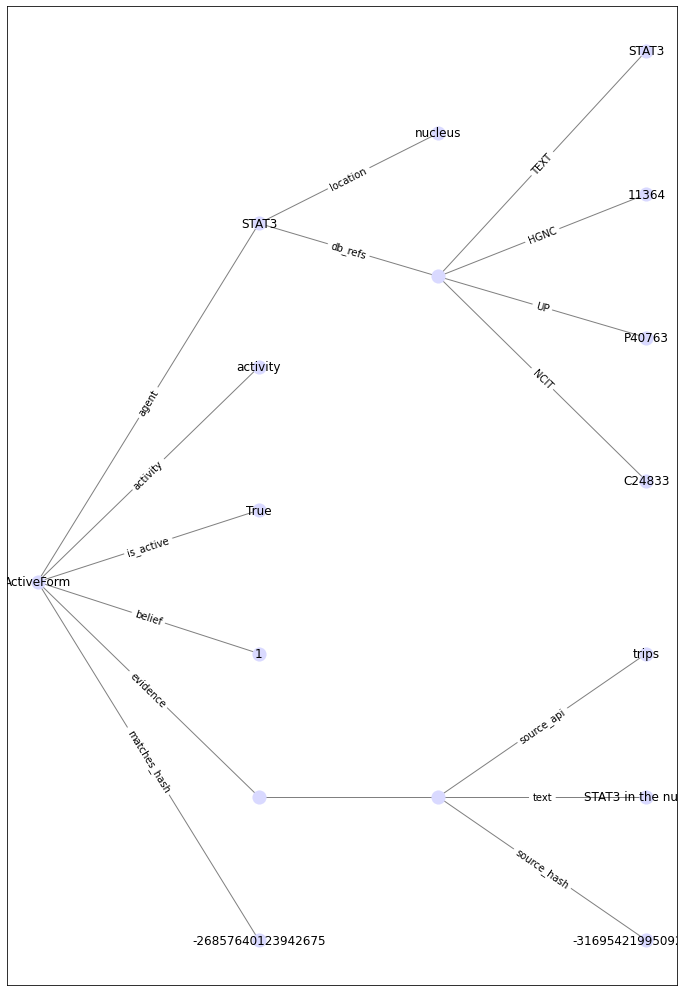

Activation(EPO(), JAK1()) 



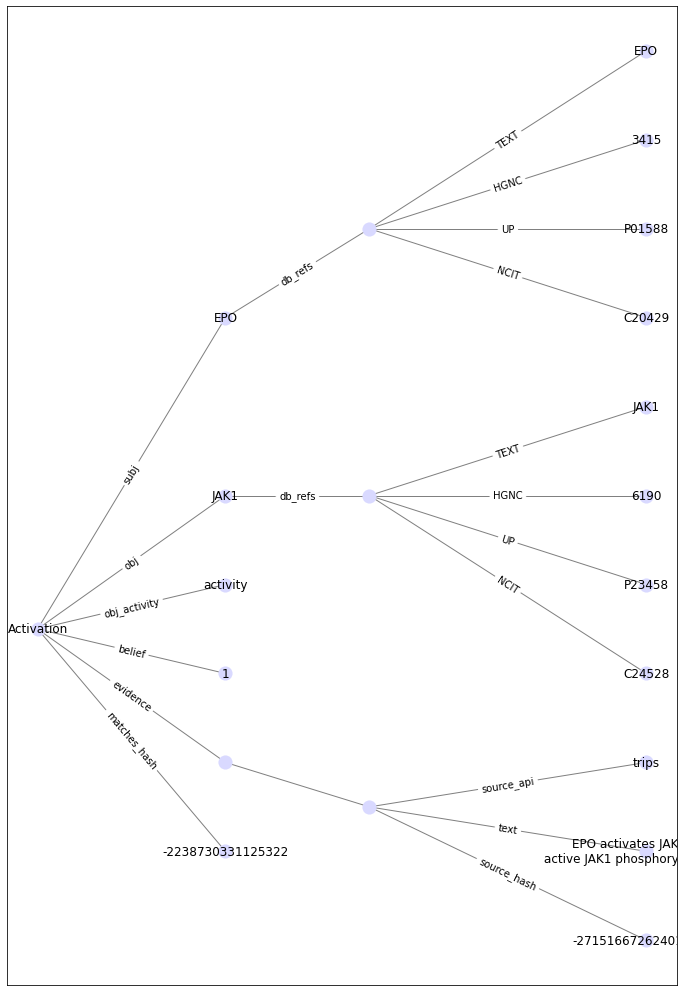

Translocation(STAT3(mods: (phosphorylation)), None, nucleus) 



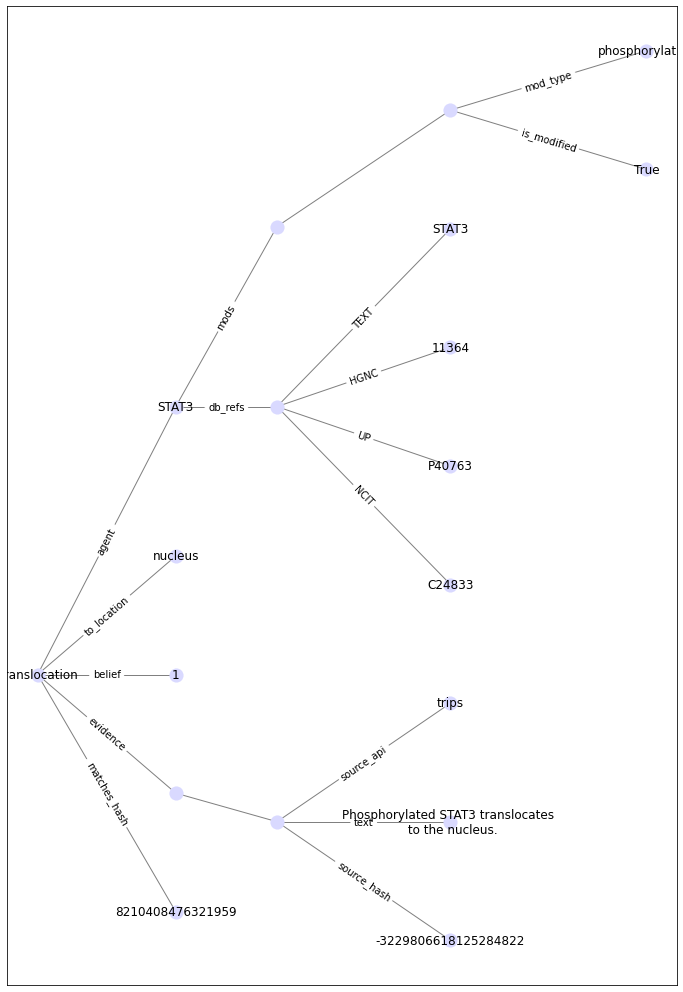

Translocation(STAT3(mods: (phosphorylation, False)), nucleus, cytoplasm) 



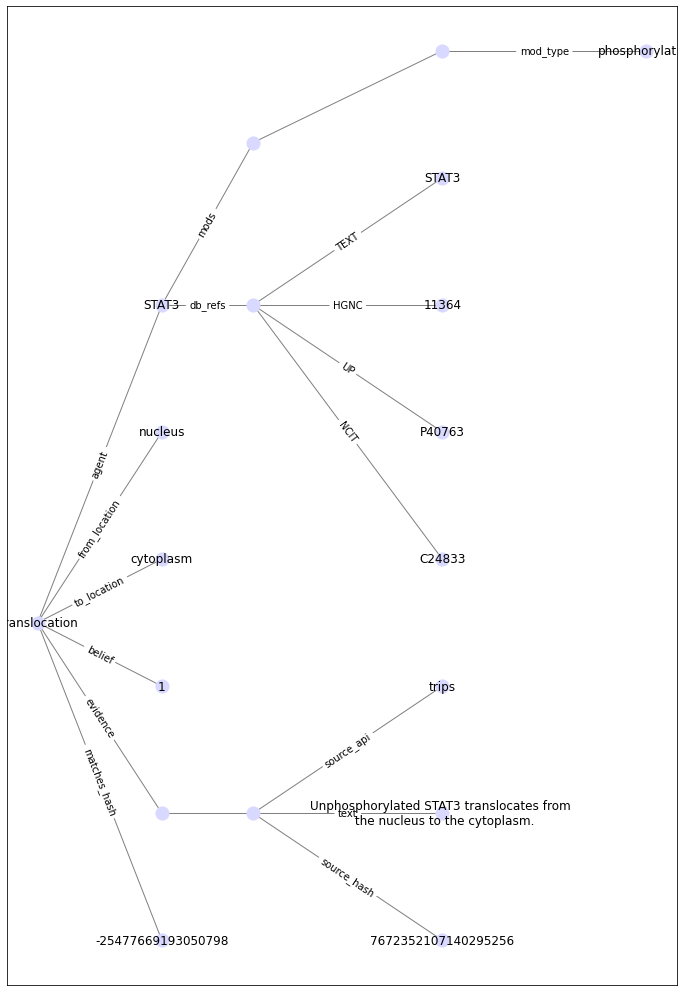

IncreaseAmount(STAT3(activity), JAK1()) 



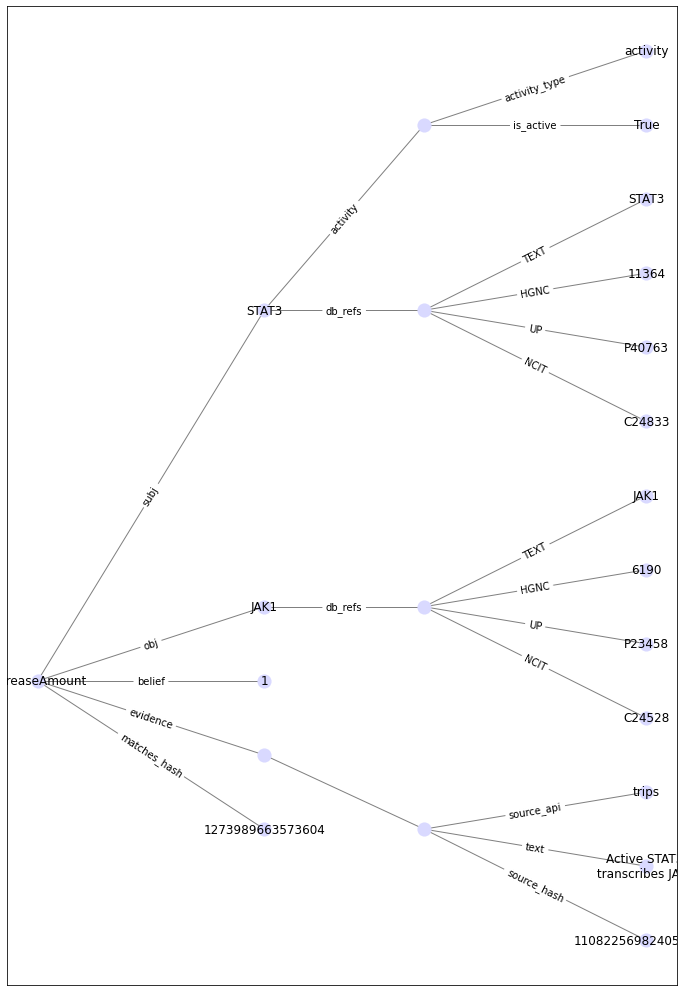

In [18]:
pylab.rcParams['figure.figsize'] = (12, 18)
tp_graph=tp.statements[1:]
#print(tp_graph,"\n")
#print(type(tp_graph))
for t in tp_graph:
    print(t,"\n")
    l=[]
    l.append(t)
    if len(l)!=0:
    
        draw_stmt_graph(l)#:])
    else:
        print("No Graph, Empty list")


##**Reading and assembling the literature from PubMed text**

NDRA also provides an interface for the REACH natural language parser. In this example, a full paper from PubMed Centralis processed. The paper's PMC ID is PMC3717945 PMID for 3717945
https://scholar.harvard.edu/bgyori/indra


Download an abstract from PubMed

In [38]:
from indra.literature import pubmed_client
abstract = pubmed_client.get_abstract('24312625')  #3717945
abstract

'Phosphorylation of ASPP2 by RAS/MAPK pathway is critical for its full pro-apoptotic function. We reported recently that apoptosis-stimulating protein of p53 (ASPP) 2, an activator of p53, co-operates with oncogenic RAS to enhance the transcription and apoptotic function of p53. However, the detailed mechanism remains unknown. Here we show that ASPP2 is a novel substrate of mitogen-activated protein kinase (MAPK). Phosphorylation of ASPP2 by MAPK is required for RAS-induced increased binding to p53 and increased transactivation of pro-apoptotic genes. In contrast, an ASPP2 phosphorylation mutant exhibits reduced p53 binding and fails to enhance transactivation and apoptosis. Thus phosphorylation of ASPP2 by RAS/MAPK pathway provides a novel link between RAS and p53 in regulating apoptosis. '

Read with two reading systems, REACH and Sparser

In [0]:
from indra.sources import reach
rp = reach.process_text(abstract)


In [40]:
rp.statements

[Phosphorylation(ERK(), TP53BP2()),
 Phosphorylation(RAS(), TP53BP2()),
 Phosphorylation(ERK(), TP53BP2()),
 Phosphorylation(ERK(), TP53BP2()),
 Phosphorylation(RAS(), TP53BP2()),
 Activation(TP53(), transcription()),
 Activation(TP53(), transcription()),
 Activation(transcription(), apoptosis())]

In [45]:
pa=mechanistic_model(rp)

INFO: [2020-05-09 00:48:10] indra.assemblers.pysb.assembler - Using two_step assembly policy.


In [48]:
model_featurs(pa)

Monomer('ERK', ['tp53bp2'])
Monomer('TP53BP2', ['phospho', 'mapk', 'ras'], {'phospho': ['u', 'p']})
Monomer('RAS', ['tp53bp2'])
Monomer('TP53')
Monomer('transcription', ['activity'], {'activity': ['inactive', 'active']})
Monomer('apoptosis', ['activity'], {'activity': ['inactive', 'active']})
--------------------------------------------------
Rule('ERK_phosphorylation_bind_TP53BP2_phospho', ERK(tp53bp2=None) + TP53BP2(phospho='u', mapk=None) >> ERK(tp53bp2=1) % TP53BP2(phospho='u', mapk=1), kf_et_bind_1)
Rule('ERK_phosphorylation_TP53BP2_phospho', ERK(tp53bp2=1) % TP53BP2(phospho='u', mapk=1) >> ERK(tp53bp2=None) + TP53BP2(phospho='p', mapk=None), kc_et_phosphorylation_1)
Rule('ERK_dissoc_TP53BP2', ERK(tp53bp2=1) % TP53BP2(mapk=1) >> ERK(tp53bp2=None) + TP53BP2(mapk=None), kr_et_bind_1)
Rule('RAS_phosphorylation_bind_TP53BP2_phospho', RAS(tp53bp2=None) + TP53BP2(phospho='u', ras=None) >> RAS(tp53bp2=1) % TP53BP2(phospho='u', ras=1), kf_rt_bind_1)
Rule('RAS_phosphorylation_TP53BP2_phosp

Phosphorylation(RAS(), TP53BP2()) 



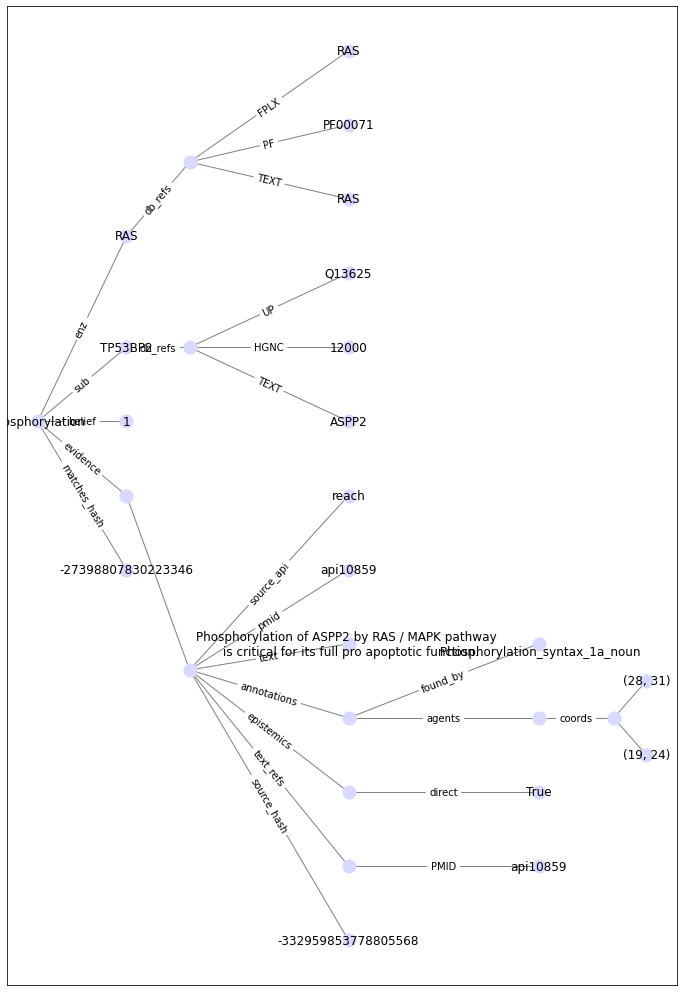

Phosphorylation(ERK(), TP53BP2()) 



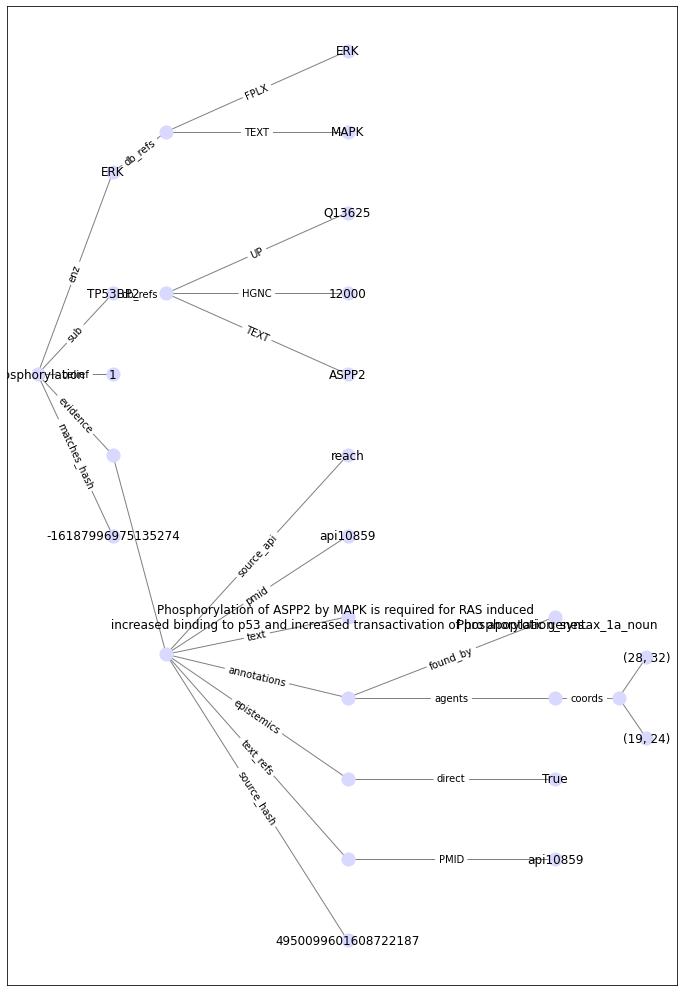

Phosphorylation(ERK(), TP53BP2()) 



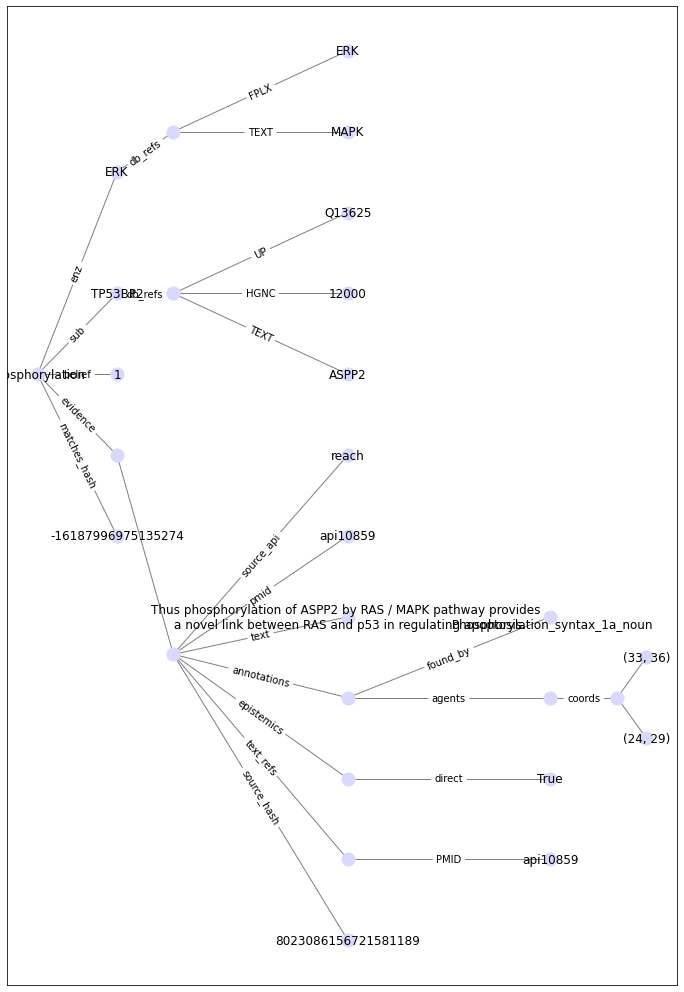

Phosphorylation(RAS(), TP53BP2()) 



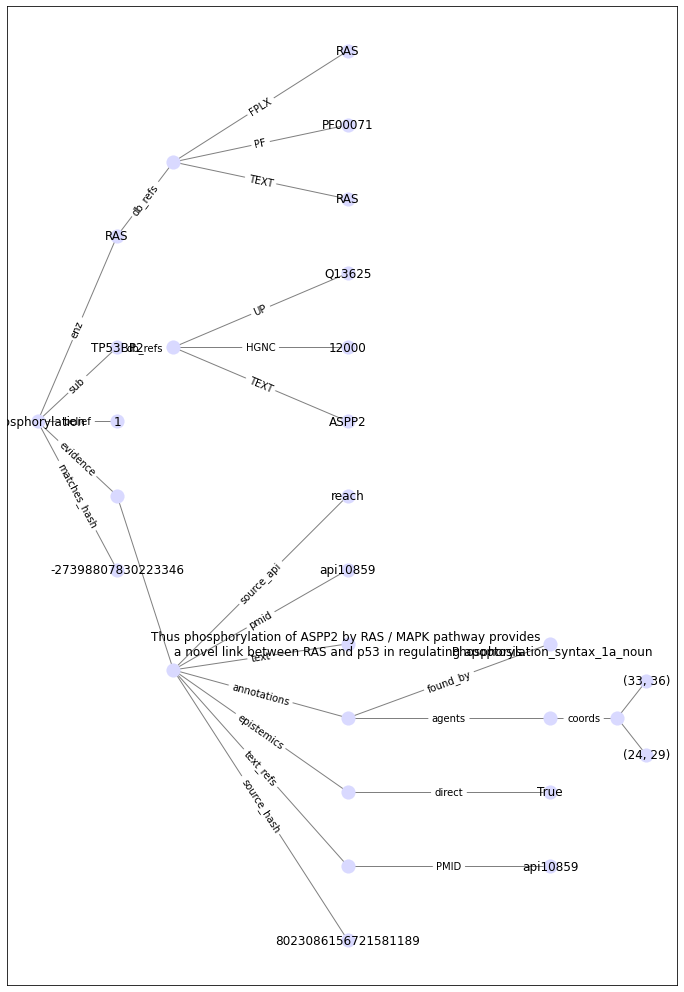

Activation(TP53(), transcription()) 



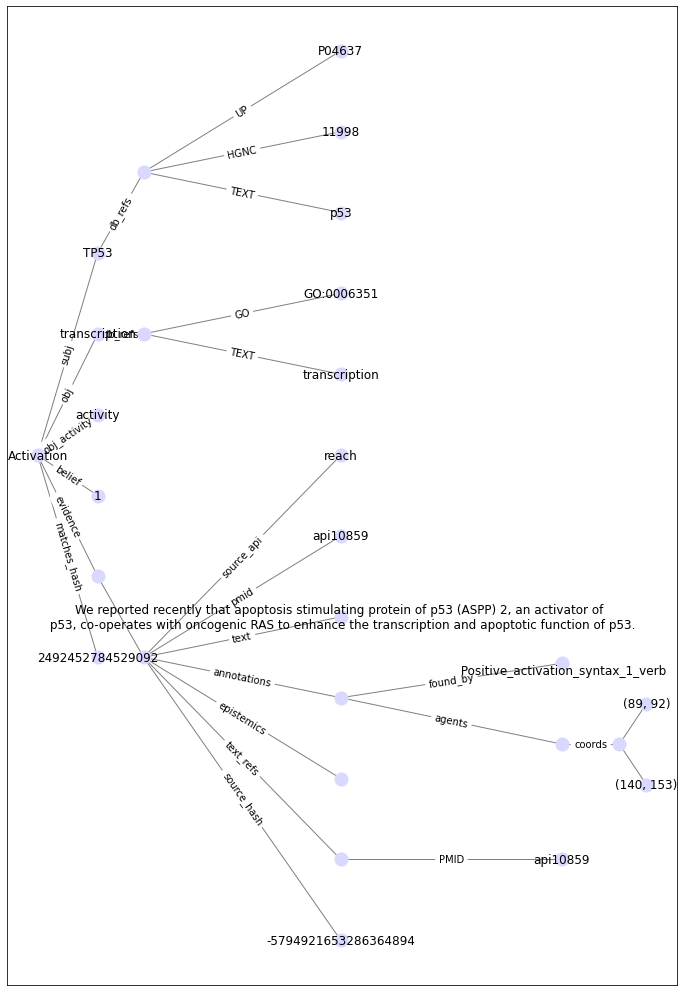

Activation(TP53(), transcription()) 



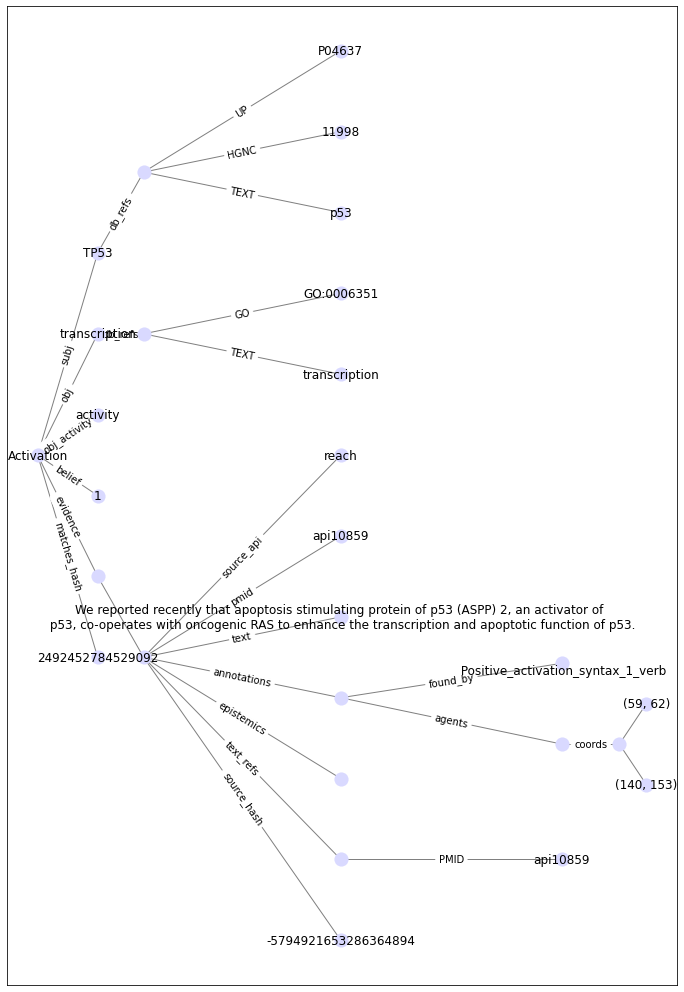

Activation(transcription(), apoptosis()) 



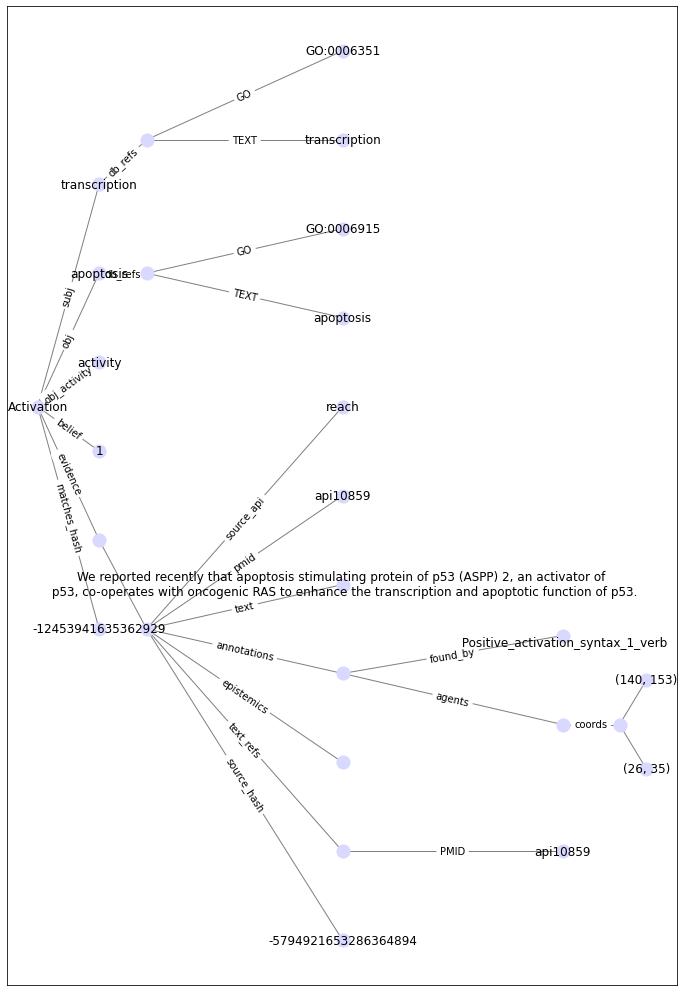

In [49]:
drow_graph(rp)